#TRANSFORMER MODEL - FLAIR

In [ ]:
!pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 788.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 9.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-

In [ ]:
from flair.datasets import ColumnCorpus
from flair.data import Corpus
from flair.datasets import CONLL_03
from flair.embeddings import WordEmbeddings, StackedEmbeddings, FlairEmbeddings, TokenEmbeddings

# define the embedding types to be used
embedding_types = [
    # GloVe embeddings
    WordEmbeddings('glove'),
]

# define columns
columns = {0 : 'text', 1 : 'ner'}

# directory where the data resides
data_folder = './data/'

# initializing the corpus
corpus: Corpus = ColumnCorpus(data_folder, columns,
                              train_file = 'train_pii.txt',
                              test_file = 'test_pii.txt',
                              dev_file = 'val_pii.txt')


2024-04-21 22:35:44,809 Reading data from data
2024-04-21 22:35:44,811 Train: data/train_pii.txt
2024-04-21 22:35:44,814 Dev: data/val_pii.txt
2024-04-21 22:35:44,816 Test: data/test_pii.txt


In [ ]:
# tag to predict
tag_type = 'ner'
# make tag dictionary from the corpus
tag_dictionary = corpus.make_tag_dictionary(tag_type=tag_type)

from flair.embeddings import WordEmbeddings, StackedEmbeddings
from typing import List
embedding_types : List[TokenEmbeddings] = [
        WordEmbeddings('glove'),
        ## other embeddings
        ]
embeddings : StackedEmbeddings = StackedEmbeddings(
                                 embeddings=embedding_types)


from flair.models import SequenceTagger

tagger : SequenceTagger = SequenceTagger(hidden_size=256,
                                       embeddings=embeddings,
                                       tag_dictionary=tag_dictionary,
                                       tag_type=tag_type,
                                       use_crf=True)
print(tagger)

<ipython-input-5-0b54030a5638>:4: DeprecationWarning: Call to deprecated method make_tag_dictionary. (Use 'make_label_dictionary' instead.) -- Deprecated since version 0.8.
  tag_dictionary = corpus.make_tag_dictionary(tag_type=tag_type)


2024-04-21 22:44:04,068 SequenceTagger predicts: Dictionary with 4 tags: O, PII, <START>, <STOP>
SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      'glove'
      (embedding): Embedding(400001, 100)
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=100, out_features=100, bias=True)
  (rnn): LSTM(100, 256, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=512, out_features=4, bias=True)
  (loss_function): ViterbiLoss()
  (crf): CRF()
)


In [ ]:
# Training the model
from flair.trainers import ModelTrainer
trainer : ModelTrainer = ModelTrainer(tagger, corpus)
trainer.train('resources/taggers/example-ner',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=150)

# Note: For the purposes of output demo, we ran the training set with max_epoch=2. However, the results shown in the report are with max_epochs=150

2024-04-21 22:44:07,987 ----------------------------------------------------------------------------------------------------
2024-04-21 22:44:07,989 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      'glove'
      (embedding): Embedding(400001, 100)
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=100, out_features=100, bias=True)
  (rnn): LSTM(100, 256, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=512, out_features=4, bias=True)
  (loss_function): ViterbiLoss()
  (crf): CRF()
)"
2024-04-21 22:44:07,992 ----------------------------------------------------------------------------------------------------
2024-04-21 22:44:07,994 Corpus: 65201 train + 8306 dev + 16629 test sentences
2024-04-21 22:44:07,996 ----------------------------------------------------------------------------------------------------
2024-04-21 22:44:07,998 Train:  

100%|██████████| 130/130 [00:22<00:00,  5.81it/s]


2024-04-21 22:49:43,911 DEV : loss 0.06826497614383698 - f1-score (micro avg)  0.8734
2024-04-21 22:49:44,205  - 0 epochs without improvement
2024-04-21 22:49:44,207 saving best model
2024-04-21 22:49:45,159 ----------------------------------------------------------------------------------------------------
2024-04-21 22:50:15,923 epoch 2 - iter 203/2038 - loss 0.10164542 - time (sec): 30.76 - samples/sec: 2635.42 - lr: 0.100000 - momentum: 0.000000
2024-04-21 22:50:47,887 epoch 2 - iter 406/2038 - loss 0.09795404 - time (sec): 62.72 - samples/sec: 2583.88 - lr: 0.100000 - momentum: 0.000000
2024-04-21 22:51:18,113 epoch 2 - iter 609/2038 - loss 0.09745232 - time (sec): 92.95 - samples/sec: 2616.44 - lr: 0.100000 - momentum: 0.000000
2024-04-21 22:51:49,298 epoch 2 - iter 812/2038 - loss 0.09644398 - time (sec): 124.14 - samples/sec: 2618.02 - lr: 0.100000 - momentum: 0.000000
2024-04-21 22:52:21,499 epoch 2 - iter 1015/2038 - loss 0.09528254 - time (sec): 156.34 - samples/sec: 2598.81

100%|██████████| 130/130 [00:22<00:00,  5.69it/s]


2024-04-21 22:55:19,827 DEV : loss 0.045295581221580505 - f1-score (micro avg)  0.9272
2024-04-21 22:55:20,144  - 0 epochs without improvement
2024-04-21 22:55:20,147 saving best model
2024-04-21 22:55:23,159 ----------------------------------------------------------------------------------------------------
2024-04-21 22:55:23,162 Loading model from best epoch ...
2024-04-21 22:55:24,091 SequenceTagger predicts: Dictionary with 4 tags: O, PII, <START>, <STOP>


100%|██████████| 260/260 [00:34<00:00,  7.48it/s]


2024-04-21 22:55:59,261 
Results:
- F-score (micro) 0.9313
- F-score (macro) 0.9313
- Accuracy 0.8714

By class:
              precision    recall  f1-score   support

         PII     0.9378    0.9248    0.9313     25290

   micro avg     0.9378    0.9248    0.9313     25290
   macro avg     0.9378    0.9248    0.9313     25290
weighted avg     0.9378    0.9248    0.9313     25290

2024-04-21 22:55:59,265 ----------------------------------------------------------------------------------------------------


{'test_score': 0.9312946704095244}

In [ ]:
from flair.datasets import DataLoader
from flair.data import Corpus
from flair.embeddings import StackedEmbeddings
from flair.models import SequenceTagger
from flair.trainers import ModelTrainer
from flair.training_utils import EvaluationMetric
from typing import List

import numpy as np

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

true_positive = 0
true_negative = 0
false_pos = 0
false_neg = 0
tag_type = 'ner'

# Load the trained model
model = SequenceTagger.load('./resources/taggers/example-ner/final-model.pt')

# Make predictions on test data
y_true = []
y_pred = []

y_true_binary = []
y_pred_binary = []

for sentence in corpus.test:
    true_labels = [token for token in sentence.tokens for label in token.get_labels(tag_type)]
    y_true = [0] * len(sentence.tokens)
    for iter in true_labels:
      # Define the regex pattern to match the token name and digits within square brackets
      pattern = r'Token\[(\d+)\]'

      # Use re.search to find the pattern in the string
      match = re.search(pattern, str(iter))

      # Extract the number from the matched group
      if match:
          number = match.group(1)
          y_true[int(number)] = 1

    model.predict(sentence)

    predicted_labels = [str(label) for token in sentence.tokens for label in token.get_labels(tag_type)]
    y_pred = [0] * len(y_true)
    for iter in predicted_labels:
      # Define the regex pattern to match the token name and digits within square brackets
      pattern = r'Token\[(\d+)\]'

      # Use re.search to find the pattern in the string
      match = re.search(pattern, str(iter))

      # Extract the number from the matched group
      if match:
          number = match.group(1)
          y_pred[int(number)] = 1
    y_true_binary.append(y_true)
    y_pred_binary.append(y_pred)
    for iter in range(len(y_true)):
      if(y_true[iter] == 1 and y_pred[iter] == 1):
        true_positive += 1
      elif(y_true[iter] == 1 and y_pred[iter] == 0):
        false_neg += 1
      elif(y_true[iter] == 0 and y_pred[iter] == 1):
        false_pos += 1
      else:
        true_negative += 1

# Calculate confusion matrix
labels = list(set(y_true + y_pred))
cm = confusion_matrix(y_true, y_pred, labels=labels)
print(true_positive,true_negative, false_pos, false_neg)


2024-04-21 22:56:48,891 SequenceTagger predicts: Dictionary with 4 tags: O, PII, <START>, <STOP>
23389 182229 1550 1901


In [ ]:
y_true_binary = sum(y_true_binary,[])
y_pred_binary = sum(y_pred_binary,[])

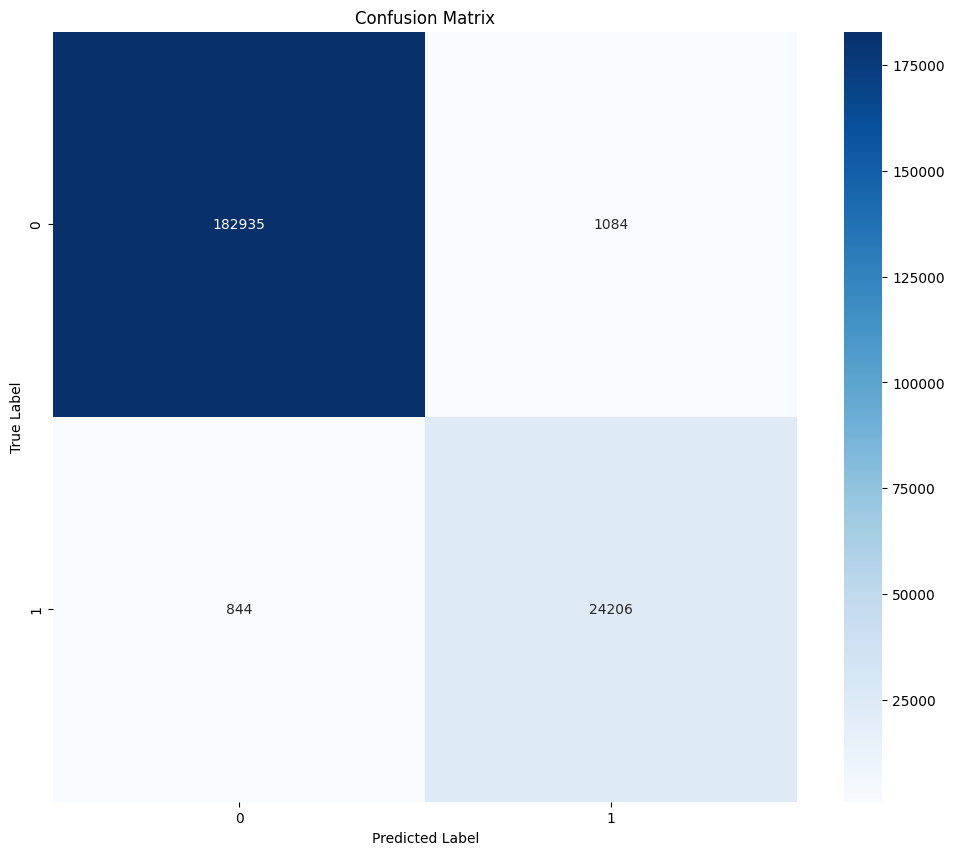

In [ ]:
# Plot confusion matrix

plt.figure(figsize=(12, 10))
cm[0][0] = true_negative
cm[1][1] = true_positive
cm[0][1] = false_neg
cm[1][0] = false_pos
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

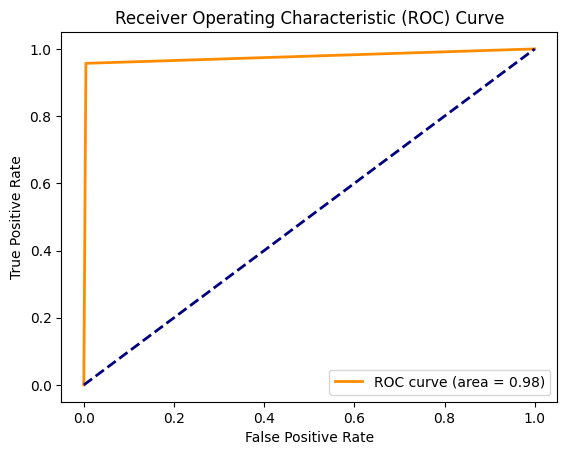

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_true_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()